# TASK 1

# Load Data

In [ ]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("BAWAHA_DATABASE.xlsx")

# Initial Data Quality Checks

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date_Vente       1500 non-null   datetime64[ns]
 1   SKU              1500 non-null   object        
 2   Collection       1500 non-null   object        
 3   Nom_Produit      1500 non-null   object        
 4   Couleur          1500 non-null   object        
 5   Taille           1500 non-null   object        
 6   Quantité_Vendue  1500 non-null   int64         
 7   Prix_Unitaire    1500 non-null   float64       
 8   Remise           1500 non-null   int64         
 9   Prix_Final       1500 non-null   float64       
 10  Canal            1500 non-null   object        
 11  Paiement         1500 non-null   object        
 12  Pays             1500 non-null   object        
 13  date_vente       1500 non-null   datetime64[ns]
 14  pays_commande    1500 non-null   object 

In [ ]:
df.isna().sum()

,0
Date_Vente,0
SKU,0
Collection,0
Nom_Produit,0
Couleur,0
Taille,0
Quantité_Vendue,0
Prix_Unitaire,0
Remise,0
Prix_Final,0


In [ ]:
df.describe()

,Date_Vente,Quantité_Vendue,Prix_Unitaire,Remise,Prix_Final,date_vente
count,1500,1500.000000,1500.000000,1500.0,1500.000000,1500
mean,2024-03-18 12:10:33.600000,1.997333,37.919333,0.0,37.919333,2023-07-13 11:36:00
min,2023-01-01 00:00:00,1.000000,9.490000,0.0,9.490000,2022-01-01 00:00:00
25%,2023-08-10 00:00:00,1.000000,39.990000,0.0,39.990000,2022-09-30 12:00:00
50%,2024-03-28 12:00:00,2.000000,39.990000,0.0,39.990000,2023-08-01 12:00:00
75%,2024-10-22 00:00:00,3.000000,39.990000,0.0,39.990000,2024-04-17 18:00:00
max,2025-06-19 00:00:00,3.000000,69.990000,0.0,69.990000,2024-12-29 00:00:00
std,NaN,0.811027,16.476053,0.0,16.476053,NaN


# Remove Outliers

In [ ]:
df = df[
    (df["Quantité_Vendue"] > 0) &
    (df["Prix_Unitaire"] >= 0) &
    (df["Prix_Final"] >= 0)
]

# Handle Missing Values

In [ ]:
df["Remise"] = df["Remise"].fillna(0)
df["Couleur"] = df["Couleur"].fillna("Unknown")
df["Taille"] = df["Taille"].fillna("Unknown")
df["Paiement"] = df["Paiement"].fillna("Unknown")
df["Taille"] = df["Taille"].fillna("Unknown")

# Standardize Formats

Date Formatting

In [ ]:
df["Date_Vente"] = pd.to_datetime(df["Date_Vente"])
df["date_vente"] = pd.to_datetime(df["date_vente"]).dt.date

Text Standardization

In [ ]:
df["SKU"] = df["SKU"].str.upper().str.strip()
df["Collection"] = df["Collection"].str.title()
df["Pays"] = df["Pays"].str.title()

Size Normalization

In [ ]:
df["Taille"] = df["Taille"].str.upper()

# Consistency Checks

In [ ]:
df["Prix_Final_Check"] = df["Prix_Unitaire"] - df["Remise"]

In [ ]:
df = df.drop(columns=["Prix_Final_Check"])

# Data Visualization

Historical Sales Trend

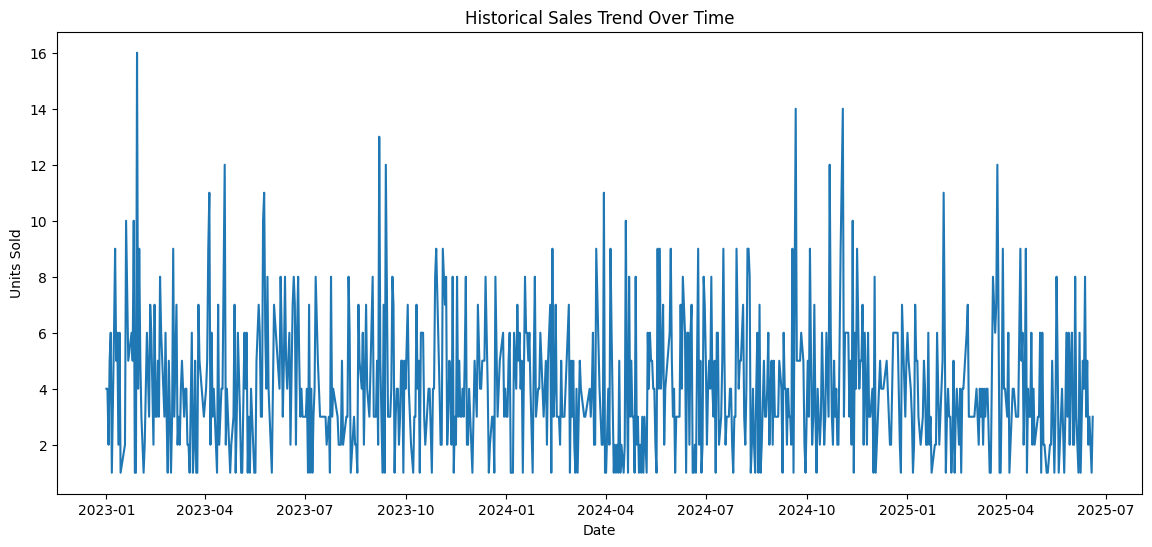

In [ ]:
sales_over_time = df.groupby(df["Date_Vente"].dt.date)["Quantité_Vendue"].sum()

plt.figure(figsize=(14, 6))
sales_over_time.plot()
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.title("Historical Sales Trend Over Time")
plt.show()


Sales by Product Size

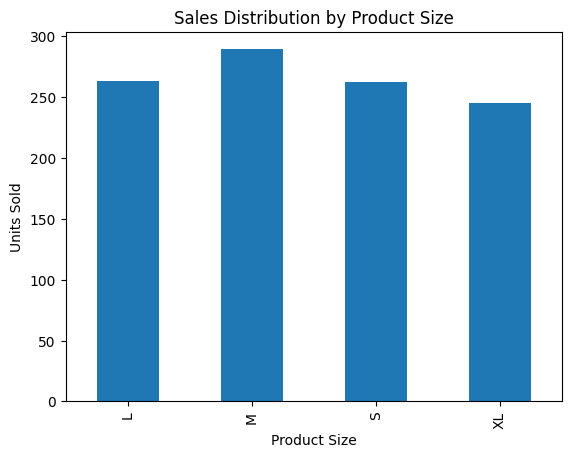

In [ ]:
size_sales = df.groupby("Taille")["Quantité_Vendue"].sum()

plt.figure()
size_sales.plot(kind="bar")
plt.xlabel("Product Size")
plt.ylabel("Units Sold")
plt.title("Sales Distribution by Product Size")
plt.show()


Sales by Product Color

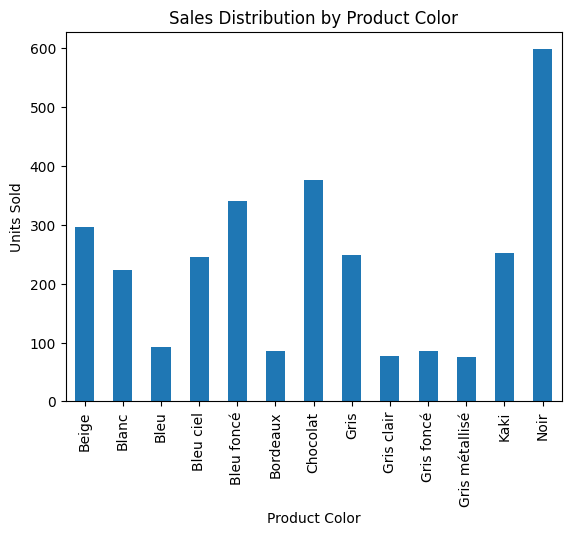

In [ ]:
color_sales = df.groupby("Couleur")["Quantité_Vendue"].sum()

plt.figure()
color_sales.plot(kind="bar")
plt.xlabel("Product Color")
plt.ylabel("Units Sold")
plt.title("Sales Distribution by Product Color")
plt.show()

# Save Cleaned Dataset

In [ ]:
# Final check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date_Vente       1500 non-null   datetime64[ns]
 1   SKU              1500 non-null   object        
 2   Collection       1500 non-null   object        
 3   Nom_Produit      1500 non-null   object        
 4   Couleur          1500 non-null   object        
 5   Taille           1500 non-null   object        
 6   Quantité_Vendue  1500 non-null   int64         
 7   Prix_Unitaire    1500 non-null   float64       
 8   Remise           1500 non-null   int64         
 9   Prix_Final       1500 non-null   float64       
 10  Canal            1500 non-null   object        
 11  Paiement         1500 non-null   object        
 12  Pays             1500 non-null   object        
 13  date_vente       1500 non-null   object        
 14  pays_commande    1500 non-null   object 

In [ ]:
# Save cleaned dataset for Data Warehouse loading
df.to_csv("BAWAHA_CLEANED_SALES.csv", index=False)

After standardizing categorical attributes and handling missing values, the final dataset contained 1,500 records with no missing values. Product sizes were normalized using uppercase formatting and a dedicated “Unknown” category where applicable. The cleaned dataset was validated using Python and exported for integration into the SQL Server data warehouse.

| **Column Name** | **Relevant? (Yes/No & Explanation)**                           | **% Empty Cells** | **Solution to Fill Empty Cells**       | **Solution for Inconsistent Size Formats** |
| --------------- | -------------------------------------------------------------- | ----------------- | -------------------------------------- | ------------------------------------------ |
| Date_Vente      | Yes – Required for time-based sales analysis and forecasting   | 0%                | No action needed                       | Standardized to datetime format            |
| SKU             | Yes – Unique product identifier used for joins and forecasting | 0%                | No action needed                       | Converted to uppercase and trimmed spaces  |
| Collection      | Yes – Used for product grouping and trend analysis             | 0%                | No action needed                       | Title case formatting applied              |
| Nom_Produit     | Yes – Used for reporting and visualization                     | 0%                | No action needed                       | Text standardization applied               |
| Couleur         | Yes – Important for product preference analysis                | 0%                | No action needed                       | Standardized text encoding and casing      |
| Taille          | Yes – Critical for size-level demand analysis                  | ~64%              | Filled missing values with `"Unknown"` | Converted to uppercase (S, M, L, XL)       |
| Quantite_Vendue | Yes – Target variable for predictive modeling                  | 0%                | No action needed                       | Verified as integer values                 |
| Prix_Unitaire   | Yes – Used in revenue and demand modeling                      | 0%                | No action needed                       | Rounded to two decimals                    |
| Remise          | Yes – Impacts final price and demand                           | 0%                | Missing values replaced with `0`       | Standardized numeric format                |
| Prix_Final      | Yes – Used for revenue analysis                                | 0%                | Recomputed when inconsistent           | Cross-checked with unit price and discount |
| Canal           | Yes – Sales channel analysis                                   | 0%                | No action needed                       | Standardized category names                |
| Paiement        | Yes – Payment method analysis                                  | 0%                | No action needed                       | Standardized text formatting               |
| Pays            | Yes – Geographical sales analysis                              | 0%                | No action needed                       | Title case normalization                   |
| date_vente      | No – Duplicate of Date_Vente                                   | 0%                | Column removed                         | Not applicable                             |
| pays_commande   | No – Redundant with Pays                                       | 0%                | Column removed                         | Not applicable                             |
